###CLUSTERING: Clustering Jerárquico

In [1]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939433 sha256=09460f5be13b7618c63d7f6024e389222fa052ccd2923f6c4dd160a3b9d2965a
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [2]:
from pydataset import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Carga del datset
iris_original = data('iris')
# Copia para luego validar
iris = iris_original.copy()
# Se eliminan las etiquetas
del iris['Species']


# Asignación de colores
iris_original['Color']='red' # Nueva columna con el color
iris_original.loc[iris_original.Species == "setosa",'Color']='green'
iris_original.loc[iris_original.Species == "versicolor",'Color']='blue'
iris_original.head()


initiated datasets repo at: /root/.pydataset/


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color
1,5.1,3.5,1.4,0.2,setosa,green
2,4.9,3.0,1.4,0.2,setosa,green
3,4.7,3.2,1.3,0.2,setosa,green
4,4.6,3.1,1.5,0.2,setosa,green
5,5.0,3.6,1.4,0.2,setosa,green


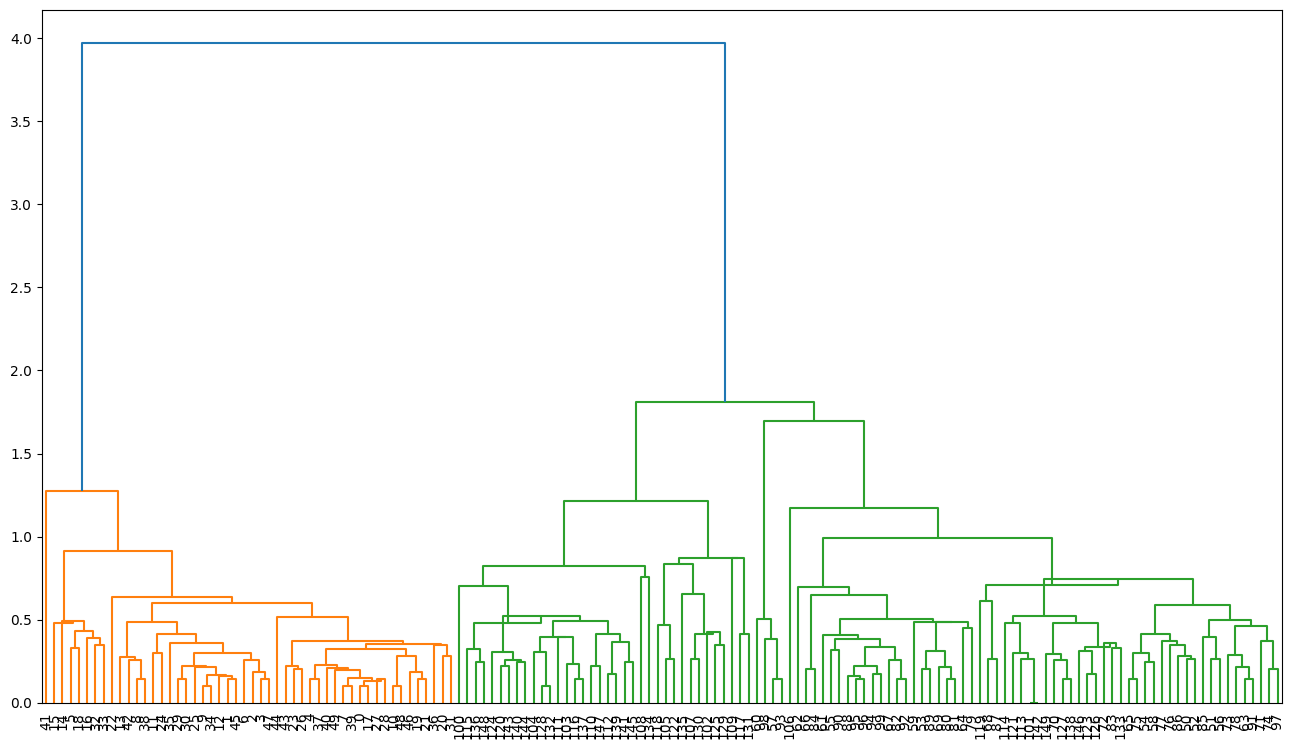

In [3]:
from scipy.cluster.hierarchy import linkage , dendrogram 
import matplotlib.pyplot as plt

# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
 
mergings = linkage(iris,method='centroid')
dendrogram(mergings,leaf_rotation=90,leaf_font_size=10)
plt.show()

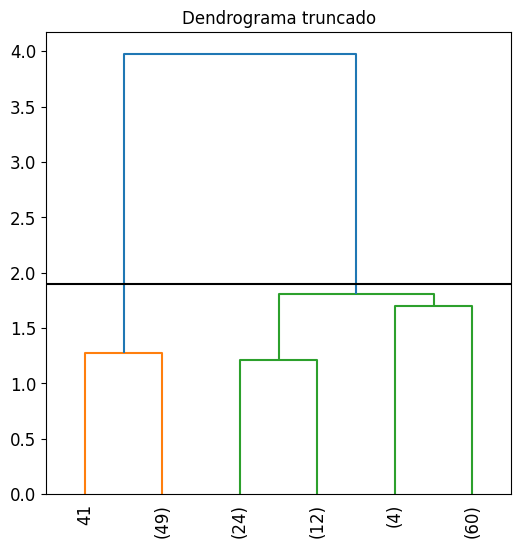

In [4]:
# Perform the necessary imports
from pydataset import data
from scipy.cluster.hierarchy import linkage , dendrogram 
import matplotlib.pyplot as plt

# Get current size
fig_size = plt.rcParams["figure.figsize"]

 # Set figure width to 12 and height to 9
fig_size[0] = 6
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# Calculate the linkage: mergings
mergings = linkage(iris,method='centroid')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,leaf_rotation=90,
            truncate_mode='lastp',  
            p=6,  
            leaf_font_size=12,
)
plt.axhline(y=1.9, c='k')

plt.title('Dendrograma truncado')
plt.yticks(size=12)
plt.show()

In [17]:
# Se extraen los clúster siguiendo el criterio de distancia
from scipy.cluster.hierarchy import fcluster
max_d = 1.7
clusters = fcluster(mergings, max_d, criterion='distance')

In [15]:
fcluster?

In [18]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [6]:
# Añade las etiquetas al dataset original
iris_original['Cluster']= clusters
iris_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color,Cluster
1,5.1,3.5,1.4,0.2,setosa,green,1
2,4.9,3.0,1.4,0.2,setosa,green,1
3,4.7,3.2,1.3,0.2,setosa,green,1
4,4.6,3.1,1.5,0.2,setosa,green,1
5,5.0,3.6,1.4,0.2,setosa,green,1


In [7]:
# Asigna colores a cada clúster
iris_original['Color2']='yellow' # Nueva columna con el color
iris_original.loc[iris_original.Cluster == 1,'Color2']='brown'
iris_original.loc[iris_original.Cluster == 2,'Color2']='cyan'
iris_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color,Cluster,Color2
1,5.1,3.5,1.4,0.2,setosa,green,1,brown
2,4.9,3.0,1.4,0.2,setosa,green,1,brown
3,4.7,3.2,1.3,0.2,setosa,green,1,brown
4,4.6,3.1,1.5,0.2,setosa,green,1,brown
5,5.0,3.6,1.4,0.2,setosa,green,1,brown


In [8]:
ct = pd.crosstab(
    iris_original['Species'],
    iris_original['Cluster'])
print(ct)

Cluster      1   2   3
Species               
setosa      50   0   0
versicolor   0   0  50
virginica    0  36  14


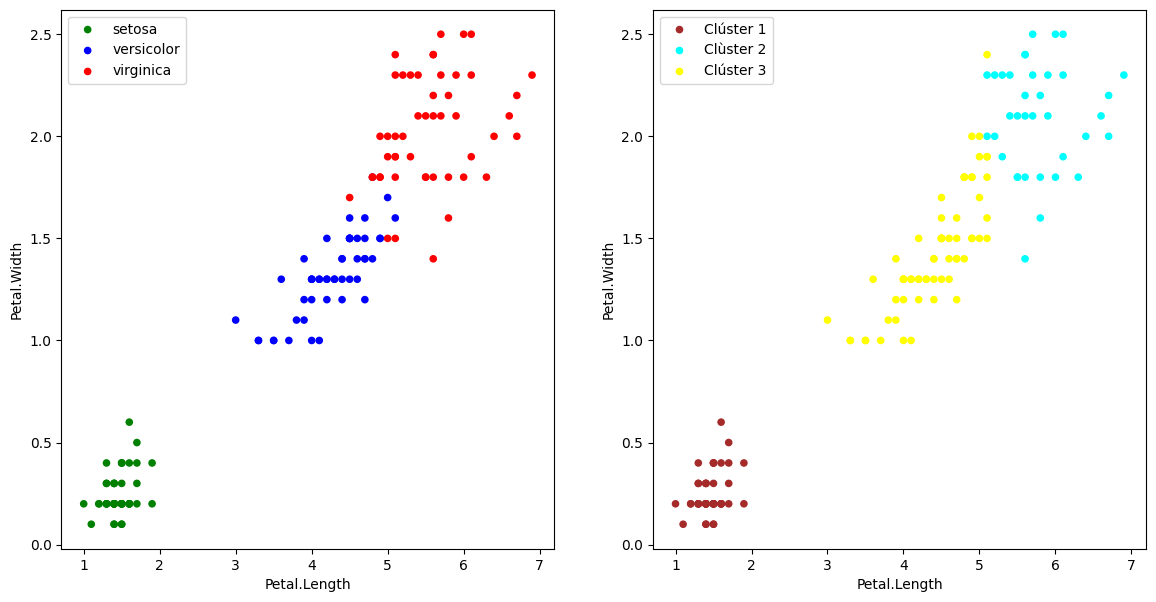

In [9]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 7
# Subplots para comparar la clusterización con los datos etiquetados: Información de pètalos
fig, axes = plt.subplots(nrows=1, ncols=2)

# Primer subplot
# Selecciona las observaciones de cada especie y las presenta en scatter plots
specie = iris_original.loc[iris_original.Species == 'setosa',:]
specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'versicolor',:]
specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'virginica',:]
ax1=specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
# Añade leyenda
ax1.legend(('setosa', 'versicolor', 'virginica'), loc='best') 


# Segundo subplot
# Selecciona las observaciones de cada clúster y las presenta en scatter plots
cluster = iris_original.loc[iris_original.Cluster == 1,:]
cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 2,:]
cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 3,:]
ax2=cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
# Añade leyenda
ax2.legend(('Clúster 1','Clùster 2','Clúster 3'), loc='best') 

plt.show()

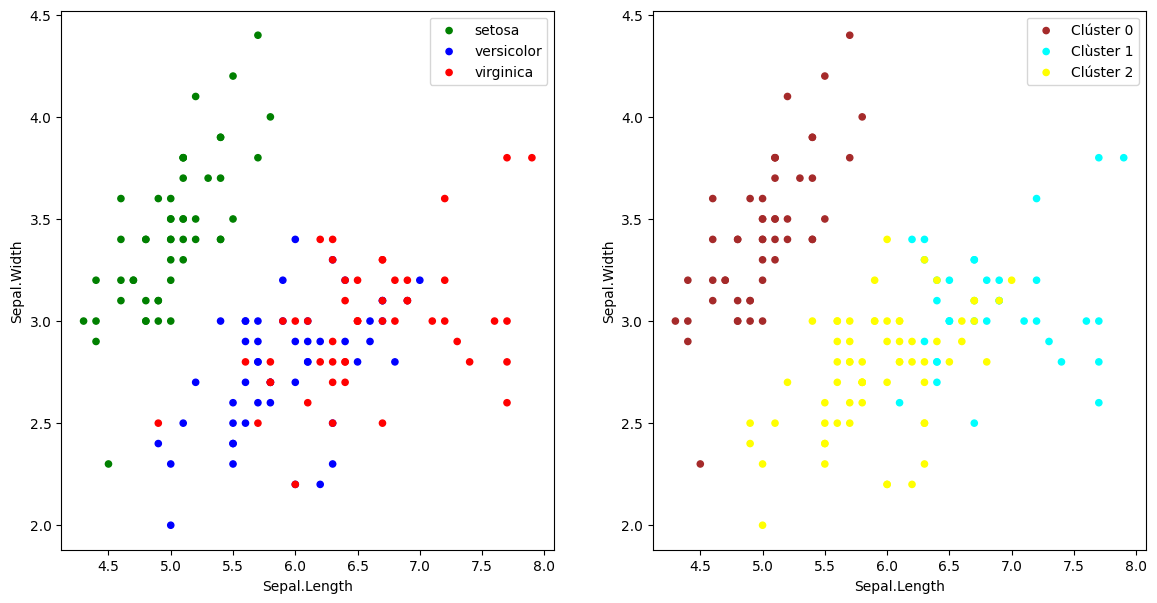

In [10]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 7
# Subplots para comparar la clusterización con los datos etiquetados: Información de sèpalos
fig, axes = plt.subplots(nrows=1, ncols=2)

# Primer subplot
# Selecciona las observaciones de cada especie y las presenta en scatter plots
specie = iris_original.loc[iris_original.Species == 'setosa',:]
specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'versicolor',:]
specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'virginica',:]
ax1=specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')

# Añade leyenda
ax1.legend(('setosa', 'versicolor', 'virginica'), loc='best') 



# Segundo subplot
# Selecciona las observaciones de cada clúster y las presenta en scatter plots
cluster = iris_original.loc[iris_original.Cluster == 1,:]
cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 2,:]
cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 3,:]
ax2=cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')

# Añade leyenda
ax2.legend(('Clúster 0','Clùster 1','Clúster 2'), loc='best') 


plt.show()

In [11]:
ct = pd.crosstab(
    iris_original['Species'],
    iris_original['Cluster'])
print(ct)

Cluster      1   2   3
Species               
setosa      50   0   0
versicolor   0   0  50
virginica    0  36  14
